# The Geometry of causal inference

In [71]:
a = np.random.normal(scale = 10, size=100)
b = np.random.normal(loc=a, scale =5)
c1 = np.random.normal(loc=a, scale =5)
c2 =  np.random.normal(loc=0.5*a+0.5*b, scale =5)

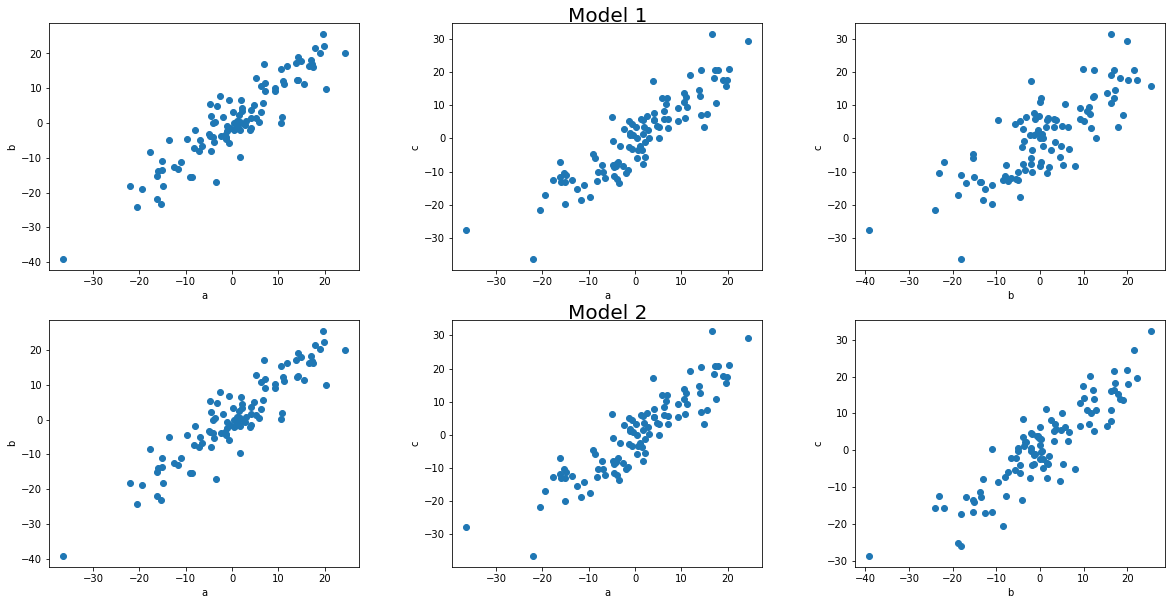

In [88]:
fig,axs = plt.subplots(2,3,figsize=(20,10),)

axs[0,1].set_title("Model 1",y= 0.98, fontsize=20)
axs[1,1].set_title("Model 2",y= 0.98, fontsize=20)
axs[0,0].scatter(a,b)
axs[0,0].set_xlabel("a")
axs[0,0].set_ylabel("b")
axs[0,1].scatter(a,c1)
axs[0,1].set_xlabel("a")
axs[0,1].set_ylabel("c")
axs[0,2].scatter(b,c1)
axs[0,2].set_xlabel("b")
axs[0,2].set_ylabel("c")

axs[1,0].scatter(a,b)
axs[1,0].set_xlabel("a")
axs[1,0].set_ylabel("b")
axs[1,1].scatter(a,c1)
axs[1,1].set_xlabel("a")
axs[1,1].set_ylabel("c")
axs[1,2].scatter(b,c2)
axs[1,2].set_xlabel("b")
axs[1,2].set_ylabel("c")

plt.subplots_adjust(wspace=0.3)

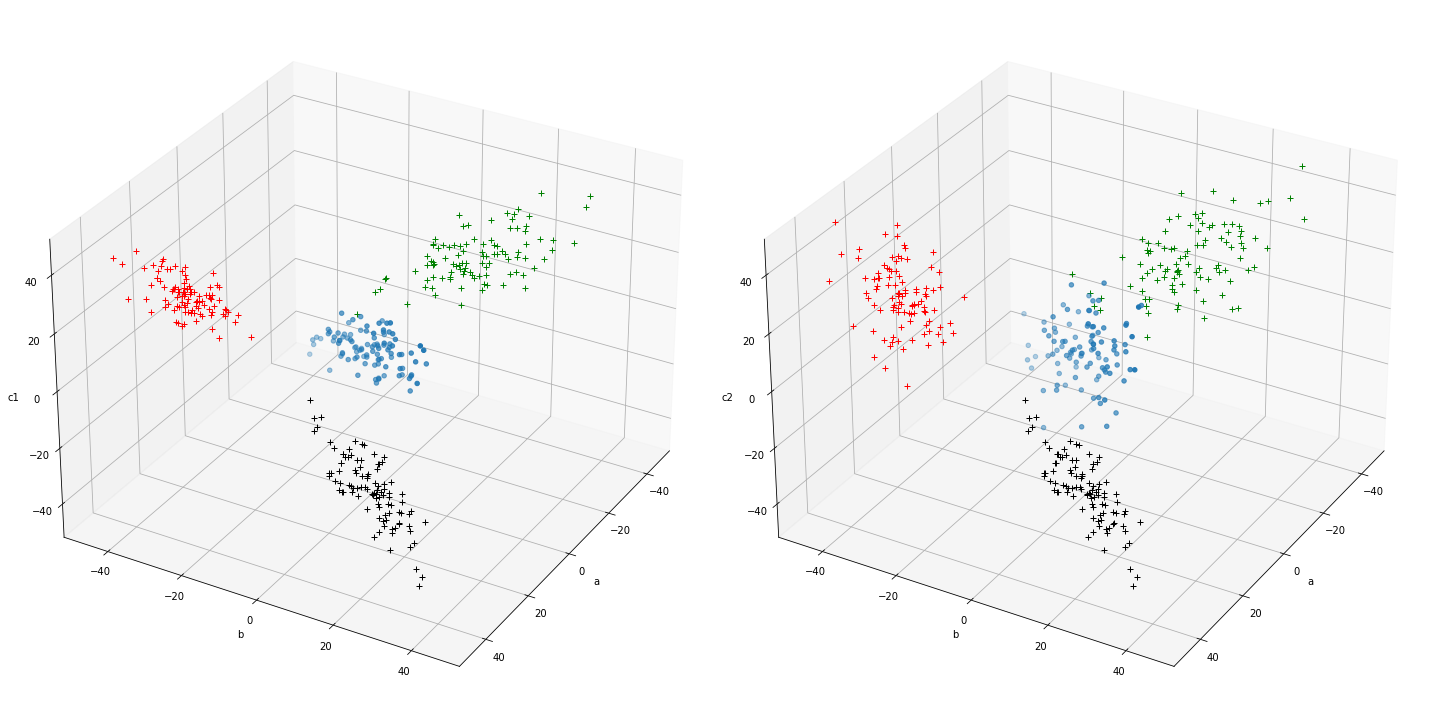

In [481]:
fig = plt.figure(figsize=(20,20))



#===============
#  First subplot
#===============
ax = fig.add_subplot(121, projection='3d')
n = 100

ax.scatter(a,b,c1)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c1')
ax.plot(a,c1, 'r+', zdir='y', zs=-50)
ax.plot(b,c1, 'g+', zdir='x', zs=-50)
ax.plot(a,b, 'k+', zdir='z', zs=-50)
# rotate the axes and update
ax.view_init(30,30)
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_zlim([-50, 50])

#===============
#  Second subplot
#===============
ax = fig.add_subplot(122, projection='3d')
n = 100

ax.scatter(a,b,c2)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c2')
ax.plot(a,c2, 'r+', zdir='y', zs=-50)
ax.plot(b,c2, 'g+', zdir='x', zs=-50)
ax.plot(a,b, 'k+', zdir='z', zs=-50)
# rotate the axes and update
ax.view_init(30,30)
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_zlim([-50, 50])

plt.tight_layout()

In [3]:
#obtain a linear model with Laplace's approximation
with pm.Model() as m4_1:
    alpha = pm.Normal('alpha', mu=100, sd=10)#prior on alpha
    beta1 = pm.Normal("beta1", mu=0,sd=5)#prior on beta
    beta2 = pm.Normal("beta2", mu=0,sd=5)#prior on beta
    mu = alpha + beta1*a + beta2*b
    height = pm.Normal('height', mu=mu, sd=10, observed=c1)#likelihood of the data
    mean_q = pm.find_MAP()
    print(mean_q)
    Hess = pm.find_hessian(mean_q, vars=[alpha, beta1,beta2])#find the hessian matrix

logp = -392.49, ||grad|| = 0.23909: 100%|██████████| 15/15 [00:00<00:00, 74.75it/s]  


{'alpha': array(1.13533776), 'beta1': array(0.8934901), 'beta2': array(0.16135339)}


In [4]:
var_cov = np.linalg.inv(Hess)

In [5]:
var_cov

array([[ 0.9909489 , -0.00426441,  0.00154623],
       [-0.00426441,  0.04982613, -0.04340007],
       [ 0.00154623, -0.04340007,  0.04749755]])

In [6]:
#obtain a linear model with Laplace's approximation
with pm.Model() as m4_1:
    alpha = pm.Normal('alpha', mu=100, sd=10)#prior on alpha
    beta1 = pm.Normal("beta1", mu=0,sd=10)#prior on beta
    beta2 = pm.Normal("beta2", mu=0,sd=10)#prior on beta
    mu = alpha + beta1*a + beta2*b
    height = pm.Normal('height', mu=mu, sd=10, observed=c2)#likelihood of the data
    mean_q2 = pm.find_MAP()
    print(mean_q2)
    Hess = pm.find_hessian(mean_q, vars=[alpha, beta1,beta2])#find the hessian matrix

logp = -431.04, ||grad|| = 2.2191: 100%|██████████| 15/15 [00:00<00:00, 81.29it/s]  


{'alpha': array(1.45312823), 'beta1': array(0.25658096), 'beta2': array(0.66573618)}


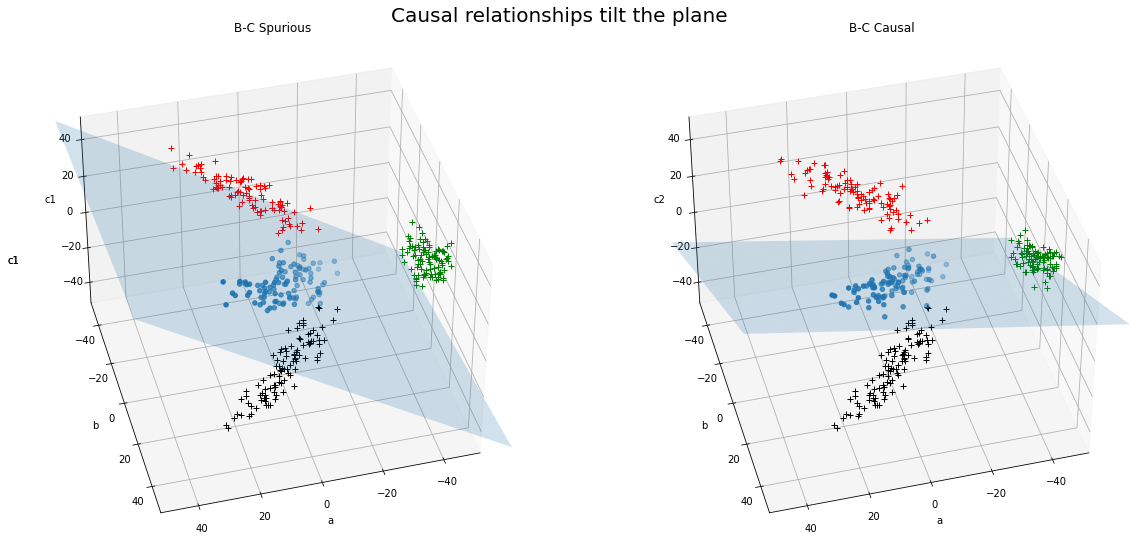

In [56]:
fig = plt.figure(figsize=(20,20))

fig.suptitle("Causal relationships tilt the plane",fontsize=20,y=0.7)
# x = np.linspace(-40,40,1000)
# y = np.linspace(-40,40,1000)
# z = mean_q["alpha"] + x* mean_q["beta1"] + y* mean_q["beta2"]
#===============
#  First subplot
#===============
ax = fig.add_subplot(121, projection='3d')
n = 100
xx, yy = np.meshgrid(range(-40,40), range(-40,40))
z = mean_q["alpha"] + xx* mean_q["beta1"] + yy* mean_q["beta2"]
ax.scatter(a,b,c1)
ax.plot_surface(xx, yy, z, alpha=0.2)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c1')
ax.plot(a,c1, 'r+', zdir='y', zs=-50)
ax.plot(b,c1, 'g+', zdir='x', zs=-50)
ax.plot(a,b, 'k+', zdir='z', zs=-50)
# rotate the axes and update
ax.view_init(30,55)
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_zlim([-50, 50])


# x = np.linspace(-40,40,1000)
# y = np.linspace(-40,40,1000)
# z = mean_q["alpha"] + x* mean_q["beta1"] + y* mean_q["beta2"]
#===============
#  First subplot
#===============
ax = fig.add_subplot(121, projection='3d')
n = 100
xx, yy = np.meshgrid(range(-40,40), range(-40,40))
z = mean_q["alpha"] + xx* mean_q["beta1"] + yy* mean_q["beta2"]
ax.scatter(a,b,c1)
ax.plot_surface(xx, yy, z, alpha=0.2)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c1')
ax.plot(a,c1, 'r+', zdir='y', zs=-50)
ax.plot(b,c1, 'g+', zdir='x', zs=-50)
ax.plot(a,b, 'k+', zdir='z', zs=-50)
# rotate the axes and update
ax.view_init(30,55)
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_zlim([-50, 50])

ax = fig.add_subplot(121, projection='3d')
n = 100
xx, yy = np.meshgrid(range(-60,60), range(-60,60))
z = mean_q["alpha"] + xx* mean_q["beta1"] + yy* mean_q["beta2"]
ax.scatter(a,b,c1)
ax.plot_surface(xx, yy, z, alpha=0.2)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c1')
ax.plot(a,c1, 'r+', zdir='y', zs=-50)
ax.plot(b,c1, 'g+', zdir='x', zs=-50)
ax.plot(a,b, 'k+', zdir='z', zs=-50)
# rotate the axes and update
ax.view_init(40,75)
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_zlim([-50, 50])
ax.set_title("B-C Spurious")

#===============
#  Second subplot
#===============
ax = fig.add_subplot(122, projection='3d')
n = 100
xx, yy = np.meshgrid(range(-60,60), range(-60,60))
z = mean_q2["alpha"] + xx* mean_q2["beta1"] + yy* mean_q2["beta2"]
ax.scatter(a,b,c2)
ax.plot_surface(xx, yy, z, alpha=0.2)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c2')
ax.plot(a,c2, 'r+', zdir='y', zs=-50)
ax.plot(b,c2, 'g+', zdir='x', zs=-50)
ax.plot(a,b, 'k+', zdir='z', zs=-50)
# rotate the axes and update
ax.view_init(40,75)
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_zlim([-50, 50])
ax.set_title("B-C Causal")
plt.savefig("Casual relations ships tils the plane")

In [71]:
a = np.random.normal(scale = 10, size=100)
b = np.random.normal(loc=a, scale =5)
c1 = np.random.normal(loc=a, scale =5)
c2 =  np.random.normal(loc=0.5*a+0.5*b, scale =5)

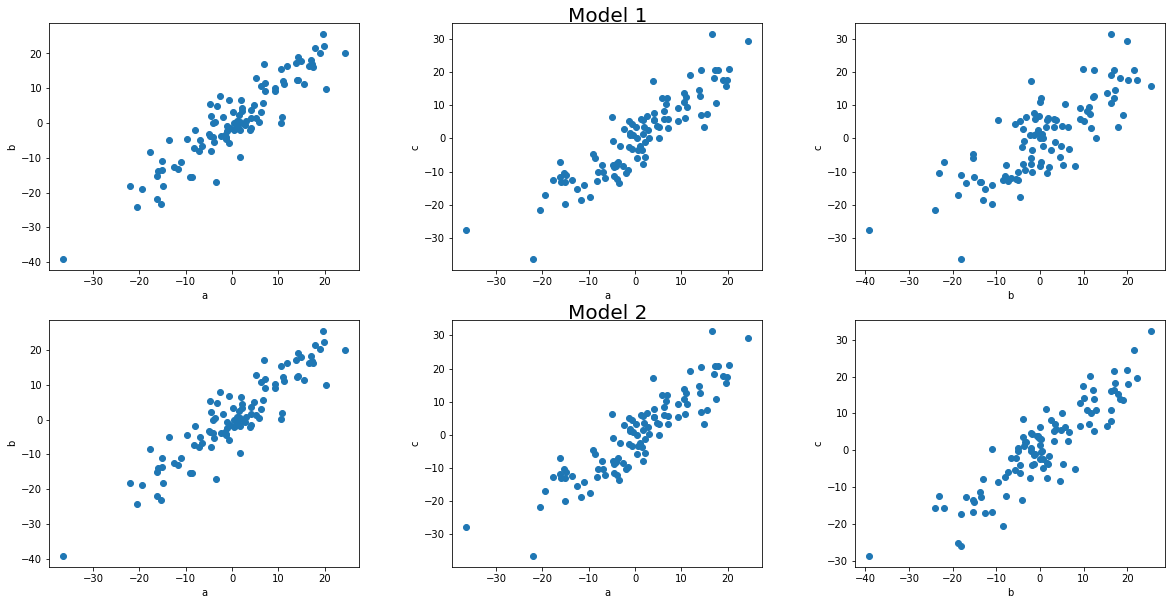

In [88]:
fig,axs = plt.subplots(2,3,figsize=(20,10),)

axs[0,1].set_title("Model 1",y= 0.98, fontsize=20)
axs[1,1].set_title("Model 2",y= 0.98, fontsize=20)
axs[0,0].scatter(a,b)
axs[0,0].set_xlabel("a")
axs[0,0].set_ylabel("b")
axs[0,1].scatter(a,c1)
axs[0,1].set_xlabel("a")
axs[0,1].set_ylabel("c")
axs[0,2].scatter(b,c1)
axs[0,2].set_xlabel("b")
axs[0,2].set_ylabel("c")

axs[1,0].scatter(a,b)
axs[1,0].set_xlabel("a")
axs[1,0].set_ylabel("b")
axs[1,1].scatter(a,c1)
axs[1,1].set_xlabel("a")
axs[1,1].set_ylabel("c")
axs[1,2].scatter(b,c2)
axs[1,2].set_xlabel("b")
axs[1,2].set_ylabel("c")

plt.subplots_adjust(wspace=0.3)

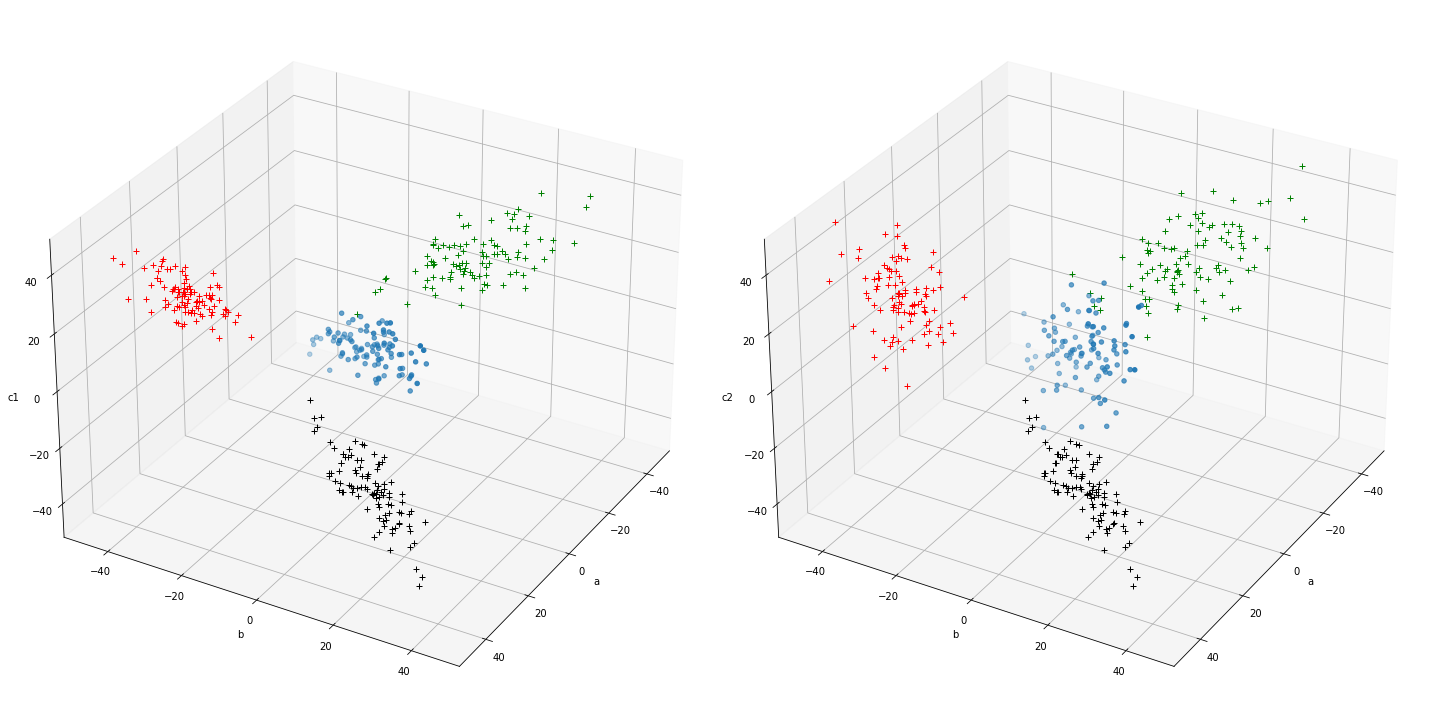

In [481]:
fig = plt.figure(figsize=(20,20))



#===============
#  First subplot
#===============
ax = fig.add_subplot(121, projection='3d')
n = 100

ax.scatter(a,b,c1)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c1')
ax.plot(a,c1, 'r+', zdir='y', zs=-50)
ax.plot(b,c1, 'g+', zdir='x', zs=-50)
ax.plot(a,b, 'k+', zdir='z', zs=-50)
# rotate the axes and update
ax.view_init(30,30)
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_zlim([-50, 50])

#===============
#  Second subplot
#===============
ax = fig.add_subplot(122, projection='3d')
n = 100

ax.scatter(a,b,c2)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c2')
ax.plot(a,c2, 'r+', zdir='y', zs=-50)
ax.plot(b,c2, 'g+', zdir='x', zs=-50)
ax.plot(a,b, 'k+', zdir='z', zs=-50)
# rotate the axes and update
ax.view_init(30,30)
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_zlim([-50, 50])

plt.tight_layout()

In [3]:
#obtain a linear model with Laplace's approximation
with pm.Model() as m4_1:
    alpha = pm.Normal('alpha', mu=100, sd=10)#prior on alpha
    beta1 = pm.Normal("beta1", mu=0,sd=5)#prior on beta
    beta2 = pm.Normal("beta2", mu=0,sd=5)#prior on beta
    mu = alpha + beta1*a + beta2*b
    height = pm.Normal('height', mu=mu, sd=10, observed=c1)#likelihood of the data
    mean_q = pm.find_MAP()
    print(mean_q)
    Hess = pm.find_hessian(mean_q, vars=[alpha, beta1,beta2])#find the hessian matrix

logp = -392.49, ||grad|| = 0.23909: 100%|██████████| 15/15 [00:00<00:00, 74.75it/s]  


{'alpha': array(1.13533776), 'beta1': array(0.8934901), 'beta2': array(0.16135339)}


In [4]:
var_cov = np.linalg.inv(Hess)

In [5]:
var_cov

array([[ 0.9909489 , -0.00426441,  0.00154623],
       [-0.00426441,  0.04982613, -0.04340007],
       [ 0.00154623, -0.04340007,  0.04749755]])

In [6]:
#obtain a linear model with Laplace's approximation
with pm.Model() as m4_1:
    alpha = pm.Normal('alpha', mu=100, sd=10)#prior on alpha
    beta1 = pm.Normal("beta1", mu=0,sd=10)#prior on beta
    beta2 = pm.Normal("beta2", mu=0,sd=10)#prior on beta
    mu = alpha + beta1*a + beta2*b
    height = pm.Normal('height', mu=mu, sd=10, observed=c2)#likelihood of the data
    mean_q2 = pm.find_MAP()
    print(mean_q2)
    Hess = pm.find_hessian(mean_q, vars=[alpha, beta1,beta2])#find the hessian matrix

logp = -431.04, ||grad|| = 2.2191: 100%|██████████| 15/15 [00:00<00:00, 81.29it/s]  


{'alpha': array(1.45312823), 'beta1': array(0.25658096), 'beta2': array(0.66573618)}


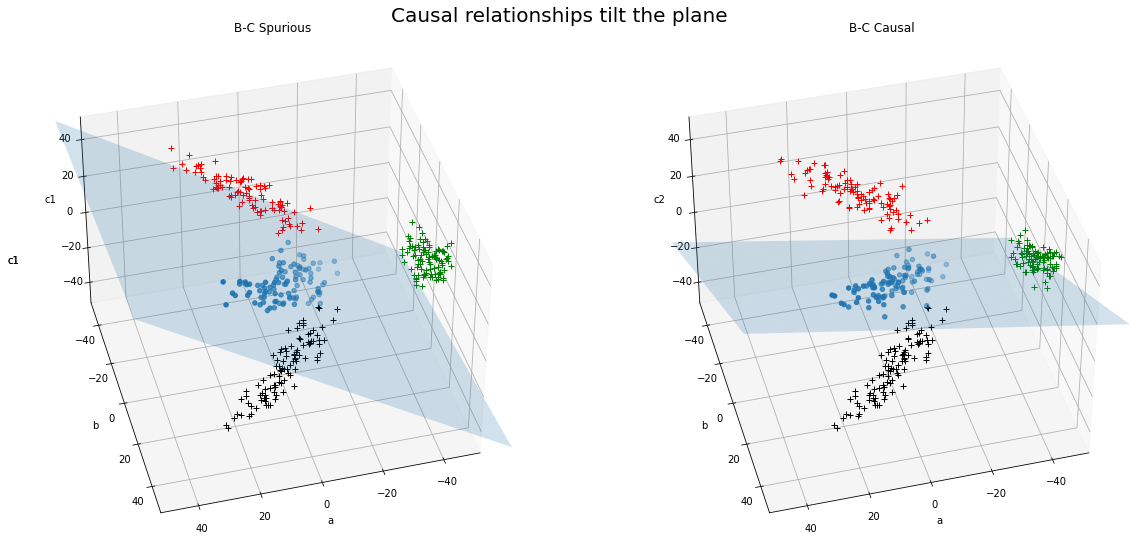

In [56]:
fig = plt.figure(figsize=(20,20))

fig.suptitle("Causal relationships tilt the plane",fontsize=20,y=0.7)
# x = np.linspace(-40,40,1000)
# y = np.linspace(-40,40,1000)
# z = mean_q["alpha"] + x* mean_q["beta1"] + y* mean_q["beta2"]
#===============
#  First subplot
#===============
ax = fig.add_subplot(121, projection='3d')
n = 100
xx, yy = np.meshgrid(range(-40,40), range(-40,40))
z = mean_q["alpha"] + xx* mean_q["beta1"] + yy* mean_q["beta2"]
ax.scatter(a,b,c1)
ax.plot_surface(xx, yy, z, alpha=0.2)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c1')
ax.plot(a,c1, 'r+', zdir='y', zs=-50)
ax.plot(b,c1, 'g+', zdir='x', zs=-50)
ax.plot(a,b, 'k+', zdir='z', zs=-50)
# rotate the axes and update
ax.view_init(30,55)
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_zlim([-50, 50])


# x = np.linspace(-40,40,1000)
# y = np.linspace(-40,40,1000)
# z = mean_q["alpha"] + x* mean_q["beta1"] + y* mean_q["beta2"]
#===============
#  First subplot
#===============
ax = fig.add_subplot(121, projection='3d')
n = 100
xx, yy = np.meshgrid(range(-40,40), range(-40,40))
z = mean_q["alpha"] + xx* mean_q["beta1"] + yy* mean_q["beta2"]
ax.scatter(a,b,c1)
ax.plot_surface(xx, yy, z, alpha=0.2)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c1')
ax.plot(a,c1, 'r+', zdir='y', zs=-50)
ax.plot(b,c1, 'g+', zdir='x', zs=-50)
ax.plot(a,b, 'k+', zdir='z', zs=-50)
# rotate the axes and update
ax.view_init(30,55)
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_zlim([-50, 50])

ax = fig.add_subplot(121, projection='3d')
n = 100
xx, yy = np.meshgrid(range(-60,60), range(-60,60))
z = mean_q["alpha"] + xx* mean_q["beta1"] + yy* mean_q["beta2"]
ax.scatter(a,b,c1)
ax.plot_surface(xx, yy, z, alpha=0.2)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c1')
ax.plot(a,c1, 'r+', zdir='y', zs=-50)
ax.plot(b,c1, 'g+', zdir='x', zs=-50)
ax.plot(a,b, 'k+', zdir='z', zs=-50)
# rotate the axes and update
ax.view_init(40,75)
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_zlim([-50, 50])
ax.set_title("B-C Spurious")

#===============
#  Second subplot
#===============
ax = fig.add_subplot(122, projection='3d')
n = 100
xx, yy = np.meshgrid(range(-60,60), range(-60,60))
z = mean_q2["alpha"] + xx* mean_q2["beta1"] + yy* mean_q2["beta2"]
ax.scatter(a,b,c2)
ax.plot_surface(xx, yy, z, alpha=0.2)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c2')
ax.plot(a,c2, 'r+', zdir='y', zs=-50)
ax.plot(b,c2, 'g+', zdir='x', zs=-50)
ax.plot(a,b, 'k+', zdir='z', zs=-50)
# rotate the axes and update
ax.view_init(40,75)
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
ax.set_zlim([-50, 50])
ax.set_title("B-C Causal")
plt.savefig("Casual relations ships tils the plane")

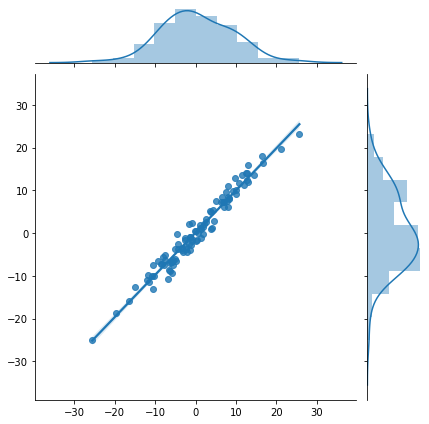

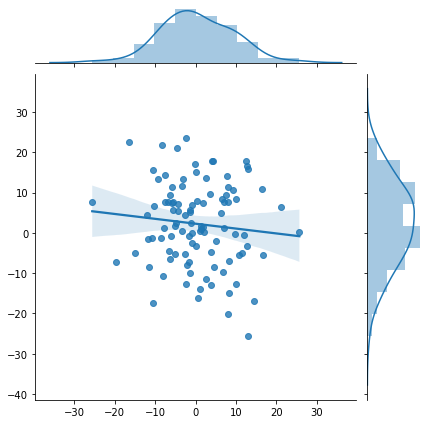

In [46]:
x = np.random.normal(loc = 1, scale = 10, size = 100)
#use x as the mean of y
#this causal model is x->y
y1 = np.random.normal(loc= x, scale = 2)
#get non causal model
y2 = np.random.normal(loc = 1, scale = 10, size = 100)
sns.jointplot(x,y1, kind="reg")
sns.jointplot(x,y2, kind="reg")

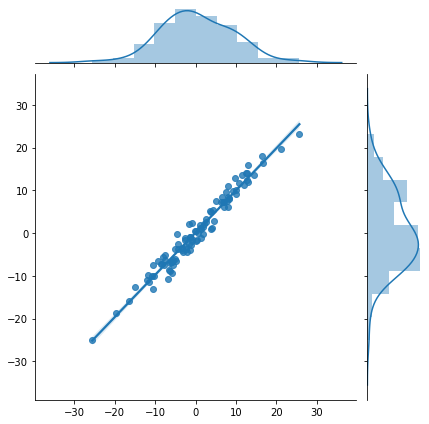

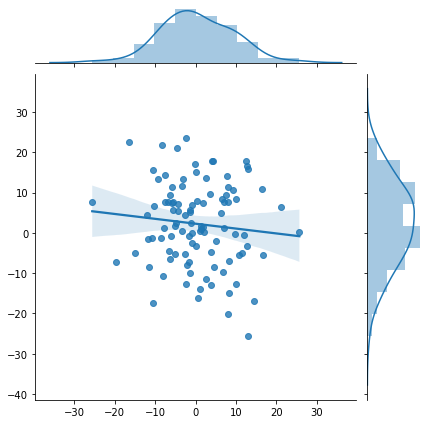

In [46]:
x = np.random.normal(loc = 1, scale = 10, size = 100)
#use x as the mean of y
#this causal model is x->y
y1 = np.random.normal(loc= x, scale = 2)
#get non causal model
y2 = np.random.normal(loc = 1, scale = 10, size = 100)
sns.jointplot(x,y1, kind="reg")
sns.jointplot(x,y2, kind="reg")